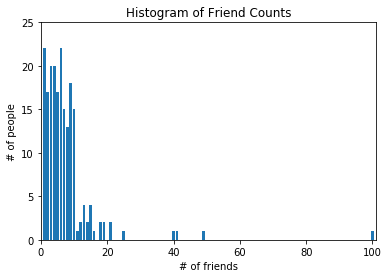

In [1]:
from collections import Counter
from linear_algebra import distance
from statistics import mean
import math, random
import matplotlib.pyplot as plt

In [2]:
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

In [3]:
def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
        for count in vote_counts.values()
        if count == winner_count])
    if num_winners == 1:
        return winner # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest


In [4]:
def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""
 # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points,
    key=lambda point_label: distance(point_label[0], new_point))
 # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]
 # and let them vote
    return majority_vote(k_nearest_labels)

In [5]:
# cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.01666
# cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

In [7]:
# # try several different values for k
# for k in [1, 3, 5, 7]:
#     num_correct = 0
#     for location, actual_language in cities:
#         other_cities = [other_city
#         for other_city in cities
#         if other_city != (location, actual_language)]
#     predicted_language = knn_classify(k, other_cities, location)
#     if predicted_language == actual_language:
#         num_correct += 1
#     print(k, "neighbor[s]:", num_correct, "correct out of", len(cities))

In [8]:
# def plot_state_borders(plt, color='0.8'):
#  pass
# def plot_cities():
#  # key is language, value is pair (longitudes, latitudes)
#  plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
#  # we want each language to have a different marker and color
#  markers = { "Java" : "o", "Python" : "s", "R" : "^" }
#  colors = { "Java" : "r", "Python" : "b", "R" : "g" }
#  for (longitude, latitude), language in cities:
#  plots[language][0].append(longitude)
#  plots[language][1].append(latitude)
#  # create a scatter series for each language
#  for language, (x, y) in plots.items():
#  plt.scatter(x, y, color=colors[language], marker=markers[language],
#  label=language, zorder=10)
#  plot_state_borders(plt) # assume we have a function that does this
#  plt.legend(loc=0) # let matplotlib choose the location
#  plt.axis([-130,-60,20,55]) # set the axes
#  plt.title("Favorite Programming Languages")
#  plt.show()

In [9]:
# plot_cities()

In [10]:
# def classify_and_plot_grid(k=1):
#  plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
#  markers = { "Java" : "o", "Python" : "s", "R" : "^" }
#  colors = { "Java" : "r", "Python" : "b", "R" : "g" }
#  for longitude in range(-130, -60):
#  for latitude in range(20, 55):
#  predicted_language = knn_classify(k, cities, [longitude, latitude])
#  plots[predicted_language][0].append(longitude)
#  plots[predicted_language][1].append(latitude)
#  # create a scatter series for each language
#  for language, (x, y) in plots.items():
#  plt.scatter(x, y, color=colors[language], marker=markers[language],
#  label=language, zorder=0)
#  plot_state_borders(plt, color='black') # assume we have a function that does this
#  plt.legend(loc=0) # let matplotlib choose the location
#  plt.axis([-130,-60,20,55]) # set the axes
#  plt.title(str(k) + "-Nearest Neighbor Programming Languages")
#  plt.show()

In [11]:
# classify_and_plot_grid()

In [12]:
# classify_and_plot_grid(3)

The Curse of Dimensionality


k-nearest neighbors runs into trouble in higher dimensions thanks to the “curse of dimensionality,” which
boils down to the fact that high-dimensional spaces are vast.
Points in high-dimensional spaces tend not to be close to one another at all.
One way to see this is by randomly generating pairs of points in the d-dimensional “unit cube” in a variety
of dimensions, and calculating the distances between them.

In [13]:
def random_point(dim):
    return [random.random() for _ in range(dim)]
def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim))
 for _ in range(num_pairs)]

In [14]:
dimensions = range(1, 101, 5)
avg_distances = []
min_distances = []
random.seed(0)
for dim in dimensions:
    distances = random_distances(dim, 10000) # 10,000 random pairs
    avg_distances.append(mean(distances)) # track the average
    min_distances.append(min(distances)) # track the minimum
    print(dim, min(distances), mean(distances), min(distances) / mean(distances))

1 7.947421226228712e-06 0.3310009902894413 2.4010264196729895e-05
6 0.18647467260473205 0.9677679968196268 0.19268530600055306
11 0.315888574043911 1.3334395796543002 0.23689755341281116
16 0.7209190490469604 1.6154152410436047 0.4462747600308797
21 0.9694045860570238 1.8574960773724116 0.5218878240800003
26 1.1698067560262715 2.0632214700056446 0.5669807013122402
31 1.2930748713962408 2.257299829279505 0.5728414340991512
36 1.5123637311959328 2.437670913316559 0.620413413038717
41 1.5514668006745476 2.6039686964057926 0.5958085451703037
46 1.6688006850159558 2.756796053135482 0.6053406392242623
51 2.0135369208019926 2.902997336534375 0.6936061895274667
56 2.1422705294432887 3.0461953095695335 0.7032610557548324
61 2.2891825062886793 3.1783717877656223 0.720237486092828
66 2.3805561409678484 3.305579571524835 0.7201630121006946
71 2.428355816745725 3.4329484139337785 0.7073674066552892
76 2.5356413086431617 3.558475062222762 0.7125640237195596
81 2.682272988673655 3.669873368578009 0.7

K-d Tree for Indexing
Step 1. for each dimension d in {1, ... , k}:
 find a median on the dimension d
 split data based on a median
Step 2. repeat Step 1 until no data is found

In [16]:
# help(neighbors.KNeighborsClassifier)

In [17]:
#help(neighbors.KDTree)

In [18]:
from sklearn.neighbors import KDTree
import numpy as np
np.random.seed(0)
X = np.random.random((10000000, 2)) # 10 million points in 2 dimensions
tree = KDTree(X, leaf_size=1)


In [19]:
%time dist, ind = tree.query([X[0]], k=5)
print(ind) # indices of 3 closest neighbors
print(dist) # distances to 3 closest neighbors

Wall time: 2.99 ms
[[      0  498131 9686005  299237 8223653]]
[[0.         0.00014007 0.00014578 0.00016266 0.00019137]]


Compare to Homework #2's result
CPU times: user 401 ms, sys: 264 ms, total: 665 ms

In [20]:
count = tree.query_radius([X[0]], r = 0.0005, count_only=True)
print(count)

[9]


In [21]:
print(X[tree.query_radius([X[0]], r = 0.0005)[0]])

[[0.5486868  0.71490509]
 [0.54875985 0.71498733]
 [0.54850997 0.71539435]
 [0.5488135  0.71518937]
 [0.54892172 0.71510044]
 [0.54897222 0.71522494]
 [0.54902884 0.71487778]
 [0.54891016 0.7152985 ]
 [0.54892252 0.71534665]]


In [22]:
help(tree.query_radius)

Help on built-in function query_radius:

query_radius(...) method of sklearn.neighbors._kd_tree.KDTree instance
    query_radius(self, X, r, count_only = False):
    
    query the tree for neighbors within a radius r
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        An array of points to query
    r : distance within which neighbors are returned
        r can be a single value, or an array of values of shape
        x.shape[:-1] if different radii are desired for each point.
    return_distance : boolean (default = False)
        if True,  return distances to neighbors of each point
        if False, return only neighbors
        Note that unlike the query() method, setting return_distance=True
        here adds to the computation time.  Not all distances need to be
        calculated explicitly for return_distance=False.  Results are
        not sorted by default: see ``sort_results`` keyword.
    count_only : boolean (default = False)
   

Use Scikit Learn KNN

In [23]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


In [25]:
# X, y = zip(*cities)
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=3)
# neigh.fit(X, y) 
# print(neigh.predict([[-86, 33]]))
# print(neigh.predict_proba([[-86, 33]]))
# print(neigh.kneighbors([[-86, 33]], 5, True))